This is project about visualisation

# First import ilbarary

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import arabic_reshaper
from bidi.algorithm import get_display

# Read data, clean and prepare to drow chart

In [4]:
Food_Data=pd.read_excel("foodindustry (2).xlsx")
Food_Data.head()

,InvoiceDate,invoiceID,CustomerID,JoinDays,VisitorName,ProdID,ProdName,FirstParent,SecondParent,ThirdParent,UnitName,UnitNetWeight(gr),SalecChannelLevel1,SalecChannelLevel2,Quantity,GrossSale,NetSales,TotalWeight
0,2021-03-20,27452,475,1876,محمدرضاشكرالله زاده,922,ارده 500,محصولات كنجدي,ارده,ارده ساده,عدد,460.0,Others,Others,1.0,345000,310500,460.0
1,2021-03-20,27452,475,1876,محمدرضاشكرالله زاده,1089,روغن ارده 1,محصولات كنجدي,روغن‌ها,روغن ارده,عدد,920.0,Others,Others,1.0,1120000,1008000,920.0
2,2021-03-20,27452,475,1876,محمدرضاشكرالله زاده,1097,روغن بكر 1,محصولات كنجدي,روغن‌ها,روغن بكر,عدد,920.0,Others,Others,1.0,1100000,990000,920.0
3,2021-03-20,27453,1535,833,محمدرضاشكرالله زاده,1066,ارده 1,محصولات كنجدي,ارده,ارده ساده,عدد,910.0,Others,Others,1.0,675000,607500,910.0
4,2021-03-20,27453,1535,833,محمدرضاشكرالله زاده,1074,حلوا ارده 750,محصولات كنجدي,حلوا,حلواارده,عدد,750.0,Others,Others,1.0,495000,445500,750.0


In [5]:
Food_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188942 entries, 0 to 188941
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceDate         188942 non-null  datetime64[ns]
 1   invoiceID           188942 non-null  int64         
 2   CustomerID          188942 non-null  int64         
 3   JoinDays            188942 non-null  int64         
 4   VisitorName         188942 non-null  object        
 5   ProdID              188942 non-null  int64         
 6   ProdName            188942 non-null  object        
 7   FirstParent         188942 non-null  object        
 8   SecondParent        188942 non-null  object        
 9   ThirdParent         188942 non-null  object        
 10  UnitName            188942 non-null  object        
 11  UnitNetWeight(gr)   166581 non-null  float64       
 12  SalecChannelLevel1  188942 non-null  object        
 13  SalecChannelLevel2  188942 no

In [6]:
Food_Data.isna().sum()

InvoiceDate               0
invoiceID                 0
CustomerID                0
JoinDays                  0
VisitorName               0
ProdID                    0
ProdName                  0
FirstParent               0
SecondParent              0
ThirdParent               0
UnitName                  0
UnitNetWeight(gr)     22361
SalecChannelLevel1        0
SalecChannelLevel2        0
Quantity                  0
GrossSale                 0
NetSales                  0
TotalWeight           22361
dtype: int64

In [7]:
Food_Data.drop_duplicates(inplace=True)

In [8]:
Food_Data['NetSales']=Food_Data['NetSales'].astype(str)
Food_Data['NetSales']=Food_Data['NetSales'].str.replace(',','')
Food_Data['NetSales']=Food_Data['NetSales'].astype(int)

Food_Data['GrossSale']=Food_Data['GrossSale'].astype(str)
Food_Data['GrossSale']=Food_Data['GrossSale'].str.replace(',','')
Food_Data['GrossSale']=Food_Data['GrossSale'].astype(int)

Food_Data['CustomerID']=Food_Data['CustomerID'].astype('str')

In [9]:
Food_Data['Month'] = Food_Data['InvoiceDate'].dt.month
Food_Data['Year'] = Food_Data['InvoiceDate'].dt.year
Food_Data['WeekOfYear'] = Food_Data['InvoiceDate'].dt.isocalendar().week

# Question1.Compare the 10 products with the highest net sales using the appropriate chart.

C:\Users\gigabyte\AppData\Local\Temp\ipykernel_6456\81068840.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(fixed_labels)


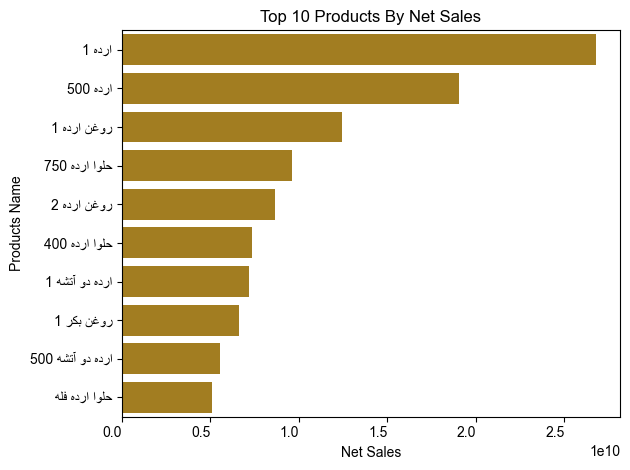

In [10]:
plt.rcParams['font.family'] = 'Arial'  
Top_10_Products=Food_Data.groupby('ProdName')['NetSales'].sum().reset_index().nlargest(n=10,columns='NetSales').reset_index(drop=True)
plt.Figure(figsize=(15,10))
fixed_labels = []
for label in Top_10_Products['ProdName']:
    reshaped_text = arabic_reshaper.reshape(str(label))
    bidi_text = get_display(reshaped_text)
    fixed_labels.append(bidi_text)
# Get the current axis
ax = plt.gca()
# Set the fixed labels
ax.set_yticklabels(fixed_labels)

sns.barplot(data=Top_10_Products, x='NetSales', y='ProdName',color='#b8860b')
# Rotate labels if needed
plt.xticks(rotation=0, ha='right')

# Fix title and labels
plt.title('Top 10 Products By Net Sales')
plt.xlabel('Net Sales')
plt.ylabel('Products Name')
plt.tight_layout()
plt.show()

# Question2.Compare the top 10 coffee shop products with the highest net sales using the appropriate chart.

C:\Users\gigabyte\AppData\Local\Temp\ipykernel_6456\1543443488.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(fixed_labelss)


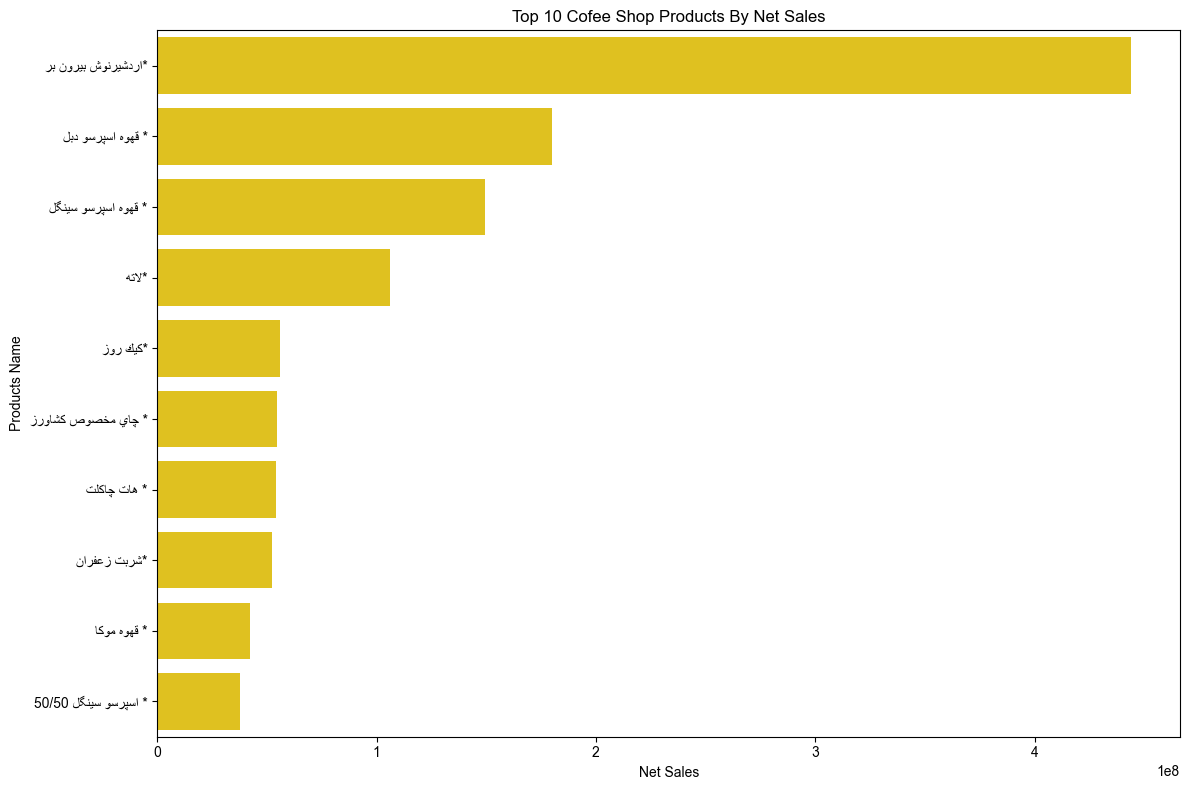

In [11]:
Cafe_data=Food_Data[Food_Data['ProdName'].str.contains(r'\*')]
Top_10_Cafe=Cafe_data.groupby('ProdName')['NetSales'].sum().reset_index().nlargest(n=10,columns='NetSales').reset_index(drop=True)
plt.figure(figsize=(12,8))
fixed_labelss = []
for label in Top_10_Cafe['ProdName']:
    reshaped_text = arabic_reshaper.reshape(str(label))
    bidi_text = get_display(reshaped_text)
    fixed_labelss.append(bidi_text)
# Get the current axis
ax = plt.gca()
ax.set_yticklabels(fixed_labelss)
# Set the fixed labels
sns.barplot(data=Top_10_Cafe,x='NetSales',y='ProdName',color='#ffd700')
plt.title('Top 10 Cofee Shop Products By Net Sales')
plt.xlabel('Net Sales')
plt.ylabel('Products Name')
plt.tight_layout()
plt.show()

# Question3.Compare the top 10 customers of the B2B sales channel through the appropriate chart.

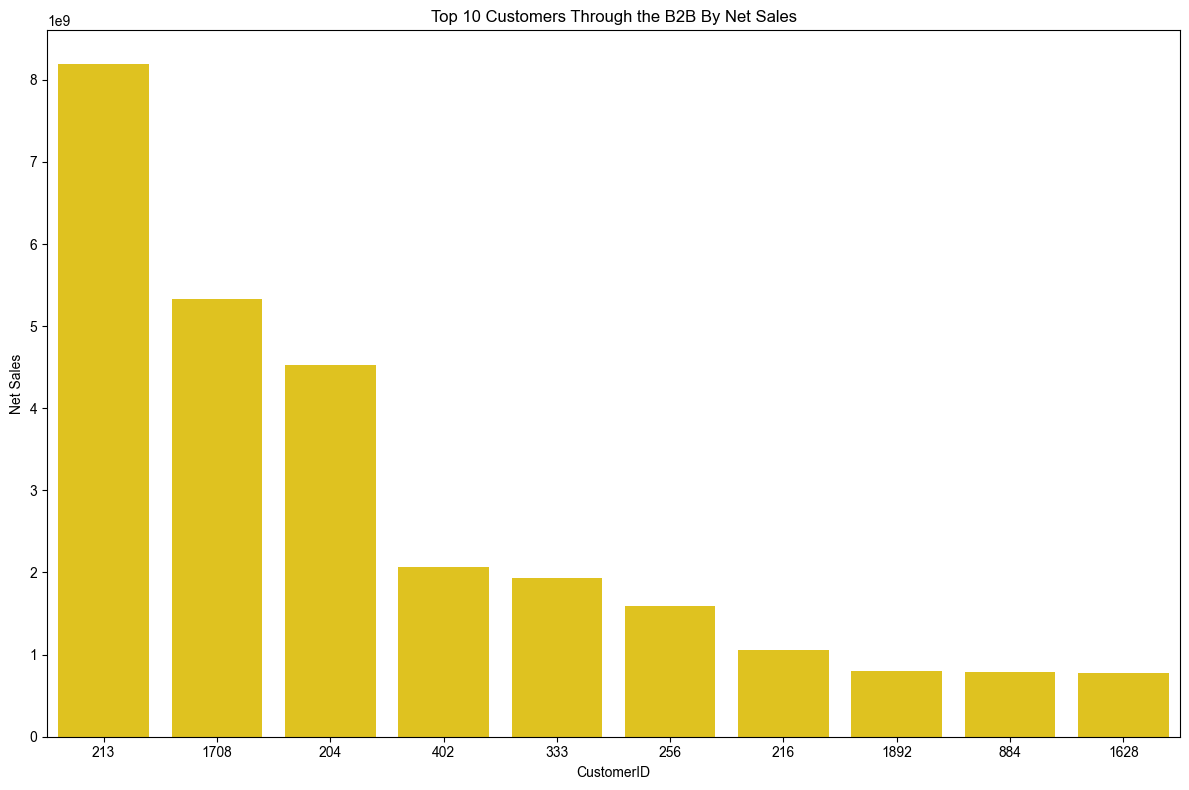

In [12]:
B2B_Data=Food_Data[Food_Data['SalecChannelLevel1']=='B2B']
top_10_customers=B2B_Data.groupby('CustomerID')['NetSales'].sum().reset_index().nlargest(n=10,columns='NetSales').reset_index(drop=True)
plt.figure(figsize=(12,8))
sns.barplot(data=top_10_customers,x='CustomerID',y='NetSales',color='#ffd800')
plt.xlabel('CustomerID')
plt.ylabel('Net Sales')
plt.title('Top 10 Customers Through the B2B By Net Sales')
plt.tight_layout()
plt.show()

# Question4.Compare the top three subgroups of each FirstParent based on net sales and Total Weight sales.

C:\Users\gigabyte\AppData\Local\Temp\ipykernel_6456\1052915543.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Sales_By_Products=Food_Data.groupby(['FirstParent','ProdName'])['NetSales'].sum().reset_index().groupby('FirstParent').apply(lambda x:x.nlargest (n=3,columns='NetSales')).reset_index(drop=True)
C:\Users\gigabyte\AppData\Local\Temp\ipykernel_6456\1052915543.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence th

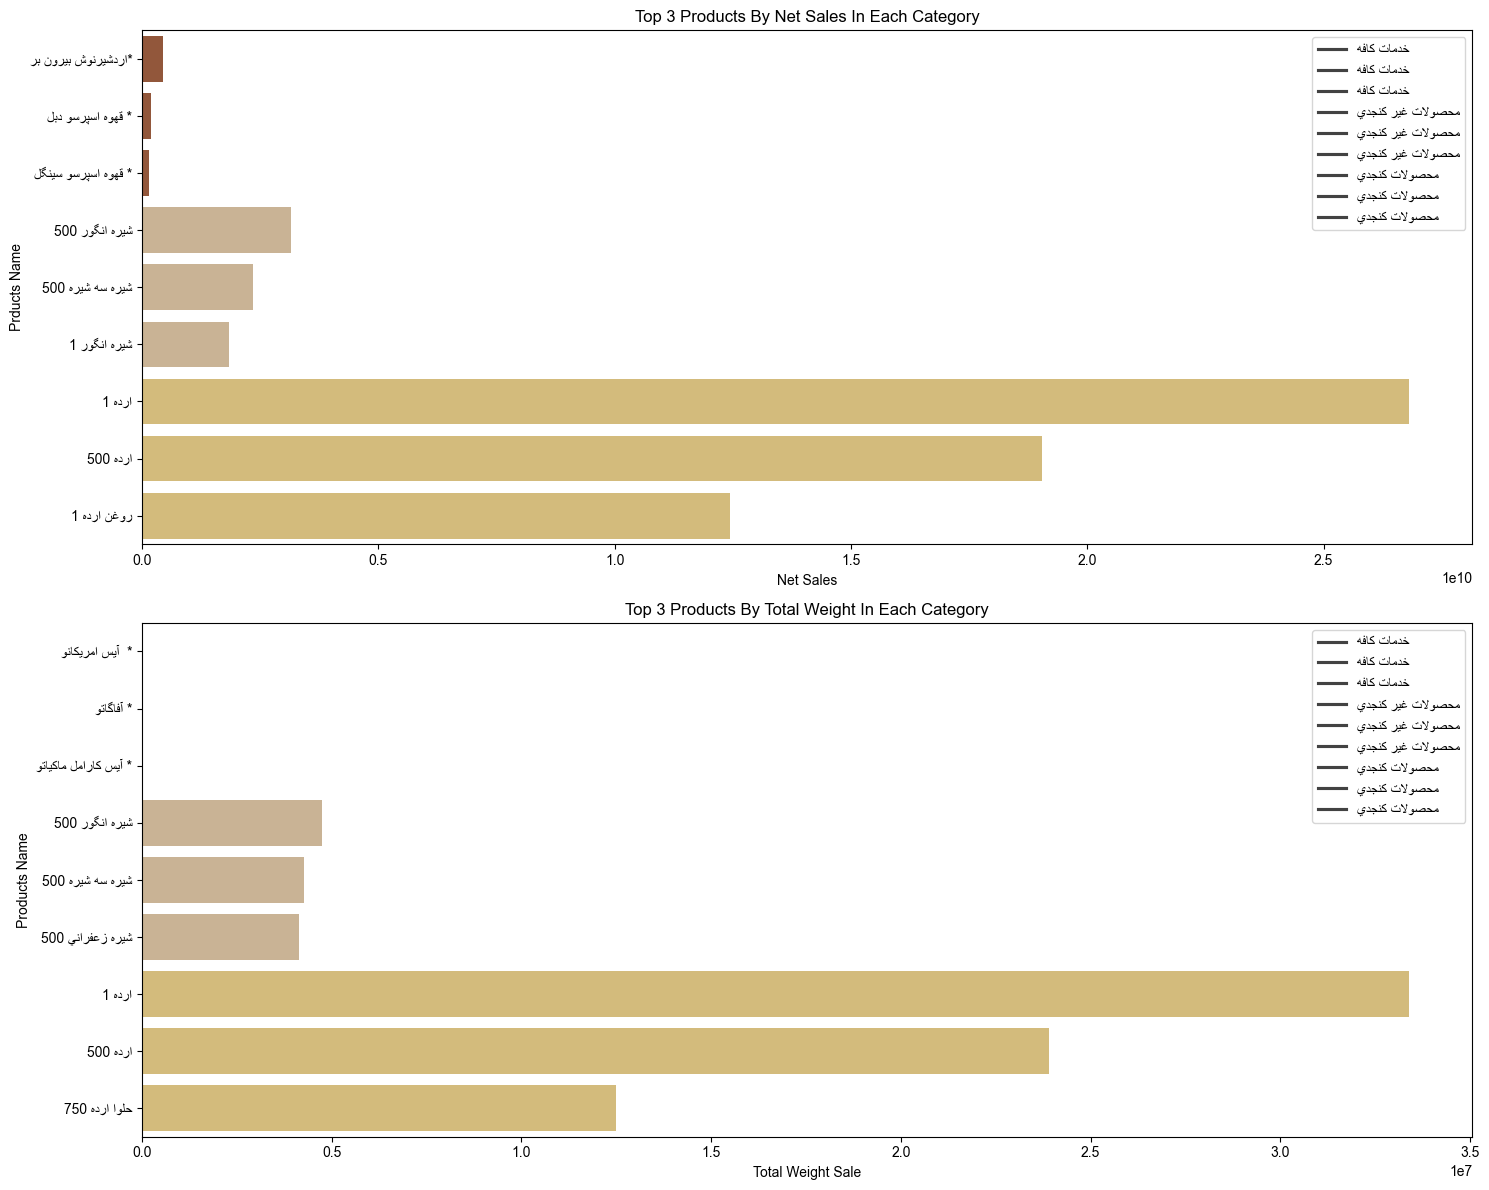

In [13]:
Sales_By_Products=Food_Data.groupby(['FirstParent','ProdName'])['NetSales'].sum().reset_index().groupby('FirstParent').apply(lambda x:x.nlargest (n=3,columns='NetSales')).reset_index(drop=True)
TotalWeight_By_Products=Food_Data.groupby(['FirstParent','ProdName'])['TotalWeight'].sum().reset_index().groupby('FirstParent').apply(lambda x:x.nlargest (n=3,columns='TotalWeight')).reset_index(drop=True)
fixed_sales_by_prod = []
for label in Sales_By_Products['ProdName']:
    reshaped_text = arabic_reshaper.reshape(str(label))
    bidi_text = get_display(reshaped_text)
    fixed_sales_by_prod.append(bidi_text)

fixed_TotalWeight_By_Prod = []
for label in TotalWeight_By_Products['ProdName']:
    reshaped_text = arabic_reshaper.reshape(str(label))
    bidi_text = get_display(reshaped_text)
    fixed_TotalWeight_By_Prod.append(bidi_text)

fixed_first_parent = []
for label in TotalWeight_By_Products['FirstParent']:
    reshaped_text = arabic_reshaper.reshape(str(label))
    bidi_text = get_display(reshaped_text)
    fixed_first_parent.append(bidi_text)

fixed_first_parents = []
for label in Sales_By_Products['FirstParent']:
    reshaped_text = arabic_reshaper.reshape(str(label))
    bidi_text = get_display(reshaped_text)
    fixed_first_parents.append(bidi_text)
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
sns.barplot(data=Sales_By_Products,x='NetSales',y='ProdName',hue='FirstParent',palette=['#a0522d','#d2b48c','#e1c16e'])
ax = plt.gca()
ax.set_yticklabels(fixed_sales_by_prod)
ax.legend(fixed_first_parents)
plt.title('Top 3 Products By Net Sales In Each Category')
plt.xlabel('Net Sales')
plt.ylabel('Prducts Name')
plt.subplot(2,1,2)
sns.barplot(data=TotalWeight_By_Products,x='TotalWeight',y='ProdName',hue='FirstParent',palette=['#a0522d','#d2b48c','#e1c16e'])
ax = plt.gca()
ax.set_yticklabels(fixed_TotalWeight_By_Prod)
ax.legend(fixed_first_parent)
plt.title('Top 3 Products By Total Weight In Each Category')
plt.xlabel('Total Weight Sale')
plt.ylabel('Products Name')
plt.tight_layout()
plt.show()

# Question5.Using treemap, compare net sales in the first and second levels of product grouping.

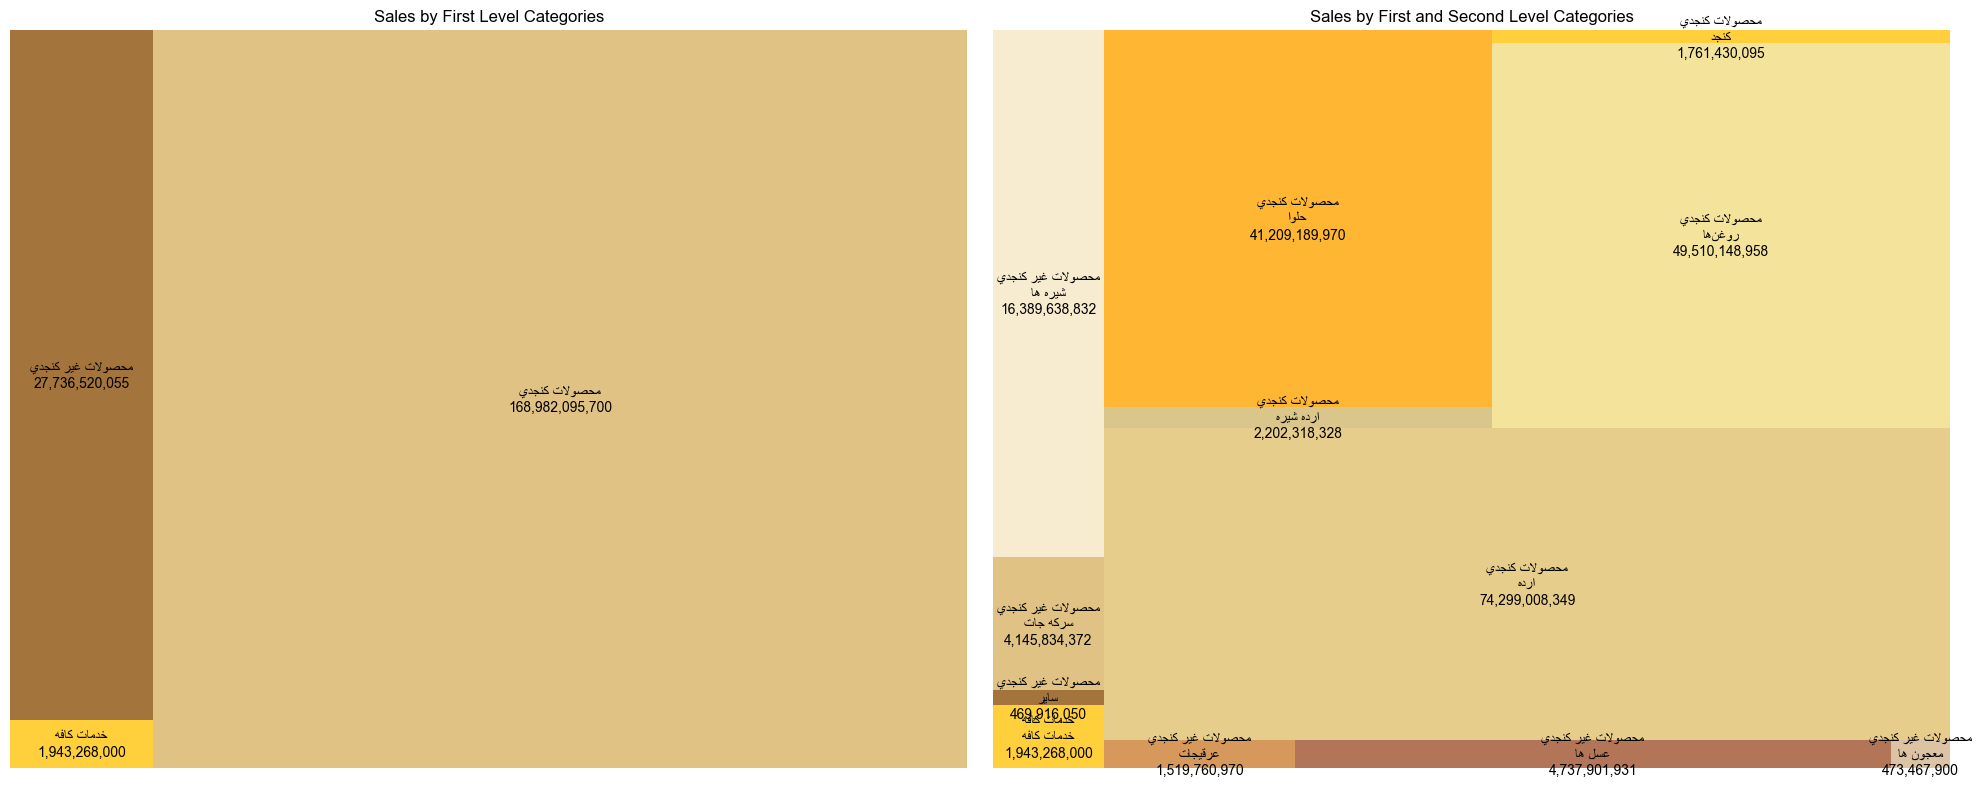

In [14]:
def process_farsi_text(text):
    reshaped_text = arabic_reshaper.reshape(str(text))
    bidi_text = get_display(reshaped_text)
    return bidi_text

level1 = Food_Data.groupby('FirstParent')['NetSales'].sum().reset_index() 
level2 = Food_Data.groupby(['FirstParent', 'SecondParent'])['NetSales'].sum().reset_index() 

plt.figure(figsize=(20, 8)) 

# First level treemap 
plt.subplot(1, 2, 1) 
sizes = level1['NetSales'] 
labels = [f'{process_farsi_text(name)}\n{value:,.0f}' 
          for name, value in zip(level1['FirstParent'], level1['NetSales'])] 
squarify.plot(sizes=sizes, label=labels, alpha=0.8,color=['#ffc30b','#8c510a','#d8b365','#f6e8c3','#cd7f32','#a0522d','#d2b48c','#e1c16e','#d1b76d','#ffa500','#f0dc82']) 
plt.axis('off') 
plt.title('Sales by First Level Categories')

# Second level treemap 
plt.subplot(1, 2, 2) 
sizes = level2['NetSales'] 
labels = [f'{process_farsi_text(p)}\n{process_farsi_text(c)}\n{v:,.0f}' 
          for p, c, v in zip(level2['FirstParent'], level2['SecondParent'], level2['NetSales'])] 
squarify.plot(sizes=sizes, label=labels, alpha=0.8,color=['#ffc30b','#8c510a','#d8b365','#f6e8c3','#cd7f32','#a0522d','#d2b48c','#e1c16e','#d1b76d','#ffa500','#f0dc82']) 
plt.axis('off') 
plt.title('Sales by First and Second Level Categories')
plt.tight_layout() 
plt.show()

# Question6.By using treemap, compare the net sales in the first and second levels of the sales channels.

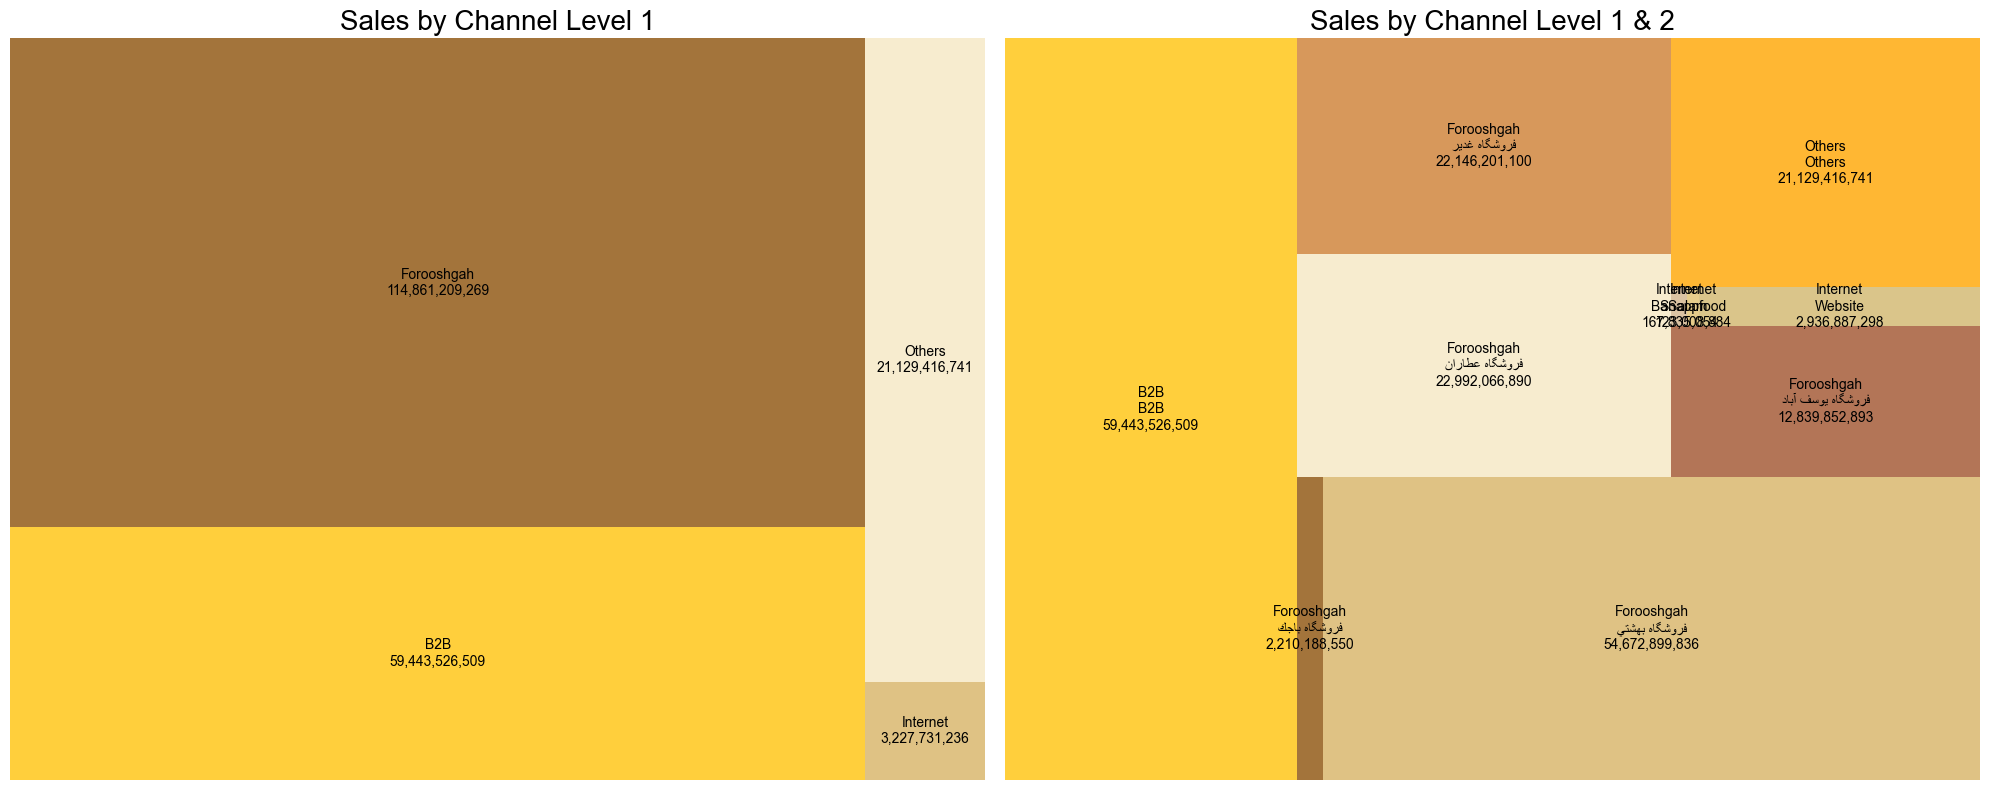

In [15]:
def process_farsi_text(text):
    reshaped_text = arabic_reshaper.reshape(str(text))
    bidi_text = get_display(reshaped_text)
    return bidi_text

# Prepare data
channel1 = Food_Data.groupby('SalecChannelLevel1')['NetSales'].sum().reset_index() 
channel2 = Food_Data.groupby(['SalecChannelLevel1', 'SalecChannelLevel2'])['NetSales'].sum().reset_index() 

# Define colors
colors = ['#ffc30b','#8c510a','#d8b365','#f6e8c3','#cd7f32',
          '#a0522d','#d2b48c','#e1c16e','#d1b76d','#ffa500','#f0dc82']

# Create the plot 
plt.figure(figsize=(20, 8)) 

# First level channel treemap 
plt.subplot(1, 2, 1) 
sizes = channel1['NetSales'] 
labels = [f'{process_farsi_text(name)}\n{value:,.0f}' 
          for name, value in zip(channel1['SalecChannelLevel1'], channel1['NetSales'])] 
squarify.plot(sizes=sizes, 
              label=labels, 
              alpha=0.8,
              color=colors[:len(channel1)]) 
plt.axis('off') 
plt.title('Sales by Channel Level 1',fontsize=20)
# Second level channel treemap 
plt.subplot(1, 2, 2) 
sizes = channel2['NetSales'] 
labels = [f'{process_farsi_text(c1)}\n{process_farsi_text(c2)}\n{value:,.0f}' 
          for c1, c2, value in zip(channel2['SalecChannelLevel1'], 
                                  channel2['SalecChannelLevel2'], 
                                  channel2['NetSales'])] 
squarify.plot(sizes=sizes, 
              label=labels, 
              alpha=0.8,
              color=colors[:len(channel2)]) 
plt.axis('off') 
plt.title('Sales by Channel Level 1 & 2',fontsize=20)
plt.tight_layout() 
plt.show()


# Question7.Compare the sales process of the first level of sales channels over time.

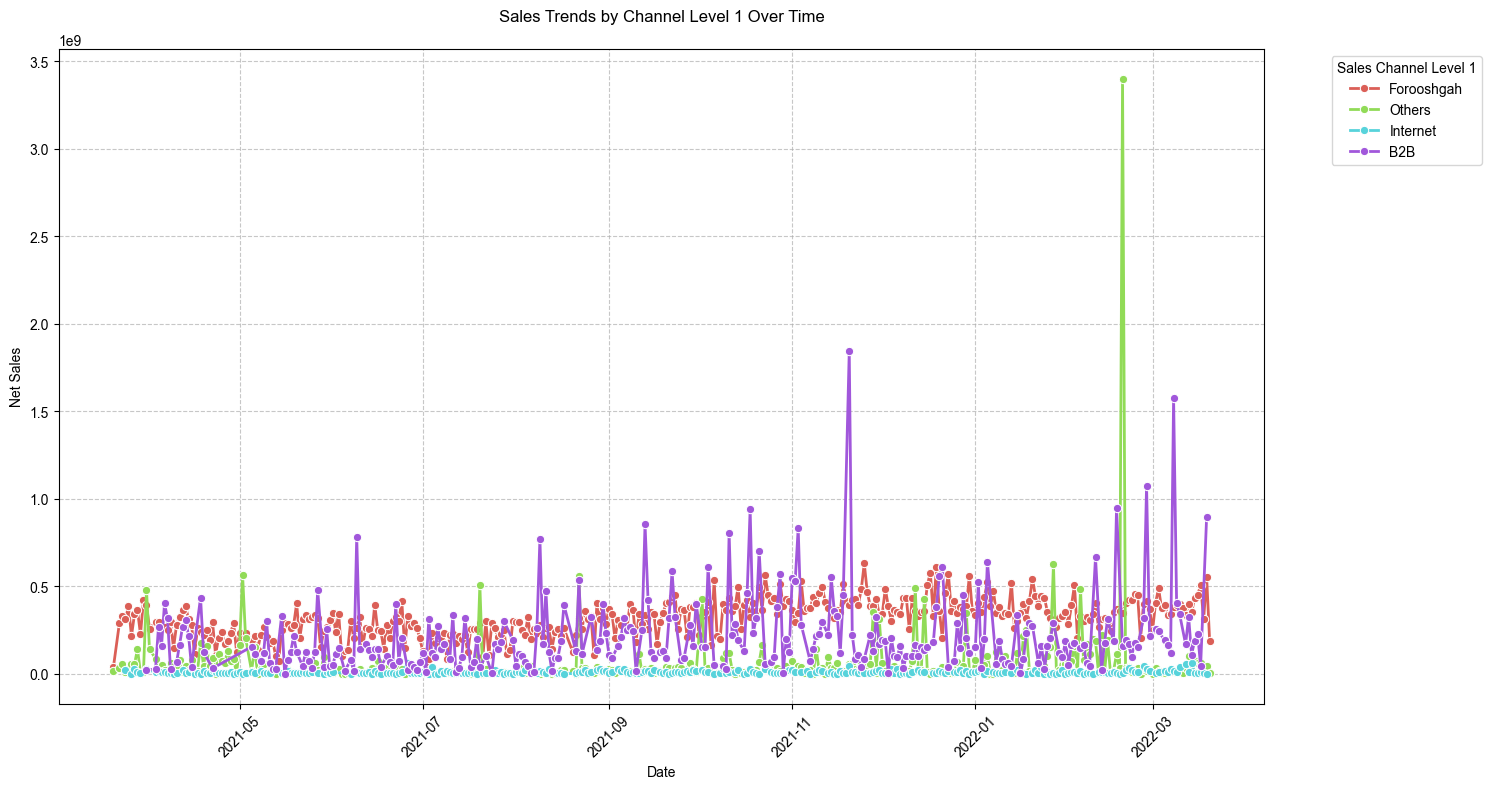

In [16]:
time_trends = (Food_Data.groupby(['InvoiceDate', 'SalecChannelLevel1'])['NetSales']
               .sum()
               .reset_index())

# Create the plot
plt.figure(figsize=(15, 8))

# Create line plot
sns.lineplot(data=time_trends,
            x='InvoiceDate',
            y='NetSales',
            hue='SalecChannelLevel1',
            linewidth=2,
            marker='o',
            palette='hls'
            )

# Customize the plot
plt.title('Sales Trends by Channel Level 1 Over Time', pad=20)
plt.xlabel('Date')
plt.ylabel('Net Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust legend
plt.legend(title='Sales Channel Level 1', bbox_to_anchor=(1.05, 1), loc='upper left')

# Enhance layout
plt.tight_layout()
plt.show()


# Question8.Compare the sales trends of different stores over time.

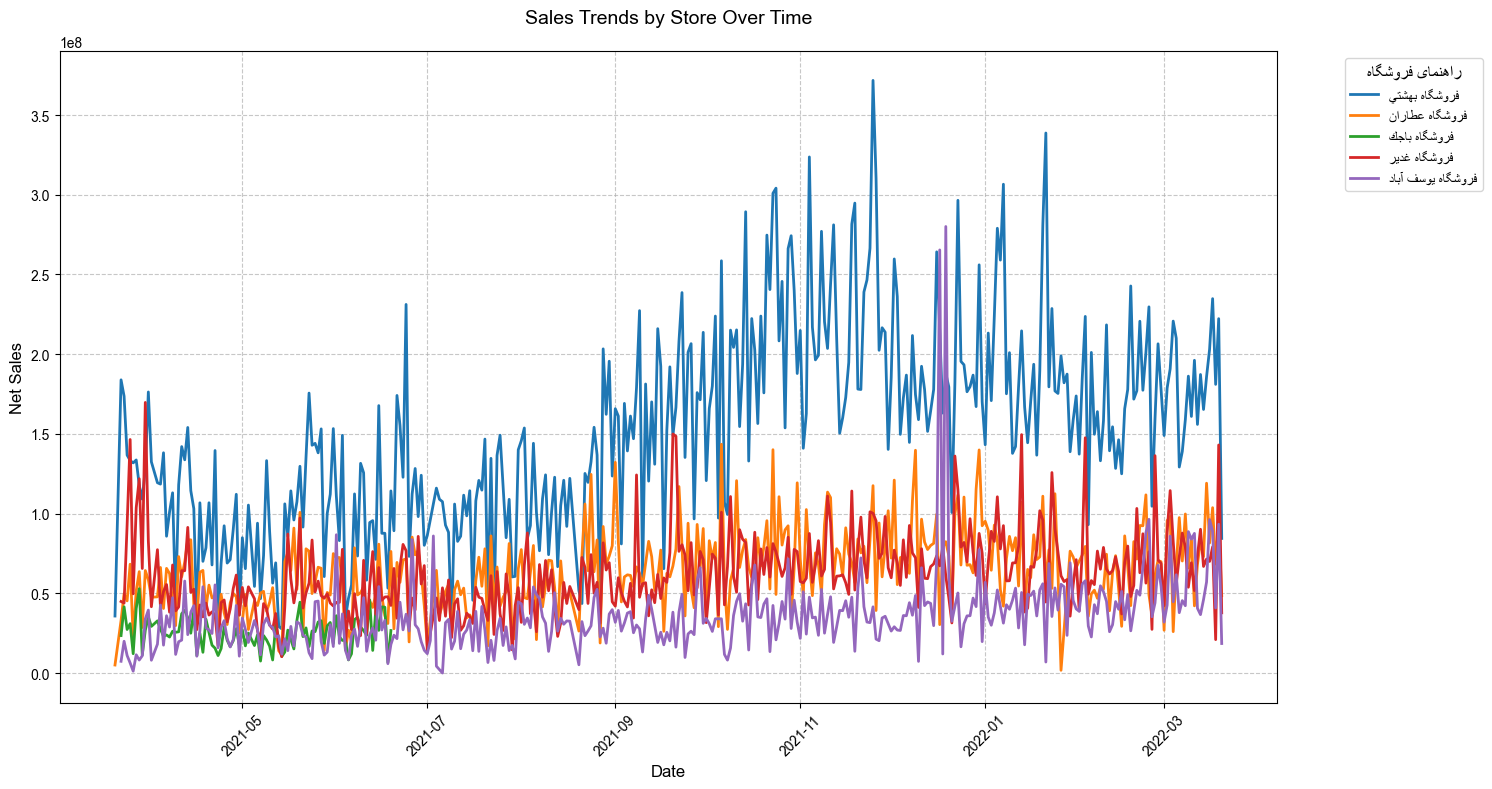

In [17]:
exclude_items = ['Others', 'Website', 'B2B','BaSalam','Snappfood']

# Filter the data
df_filtered = Food_Data[~Food_Data['SalecChannelLevel2'].isin(exclude_items)]

# Group data by date and store (SalesChannelLevel2)
store_trends = (df_filtered.groupby(['InvoiceDate', 'SalecChannelLevel2'])['NetSales']
                .sum()
                .reset_index())

# Create the plot
plt.figure(figsize=(15, 8))

# Create line plot
sns.lineplot(data=store_trends,
            x='InvoiceDate',
            y='NetSales',
            hue='SalecChannelLevel2',
            linewidth=2,
            markers='o')

# Customize the plot
plt.title('Sales Trends by Store Over Time', pad=20, fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Net Sales', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)
handles, labels = plt.gca().get_legend_handles_labels()

# Process Farsi text for legend labels
farsi_labels = [process_farsi_text(label) for label in labels]
plt.legend(handles, 
          farsi_labels,
          title=process_farsi_text('راهنمای فروشگاه'),
          bbox_to_anchor=(1.05, 1),
          loc='upper left',
          fontsize=10,
          title_fontsize=12)

# Enhance layout
plt.tight_layout()
plt.show()

# Question9.Compare the sales of the categories in SecondParent in different months of the year through a heatmap graph.

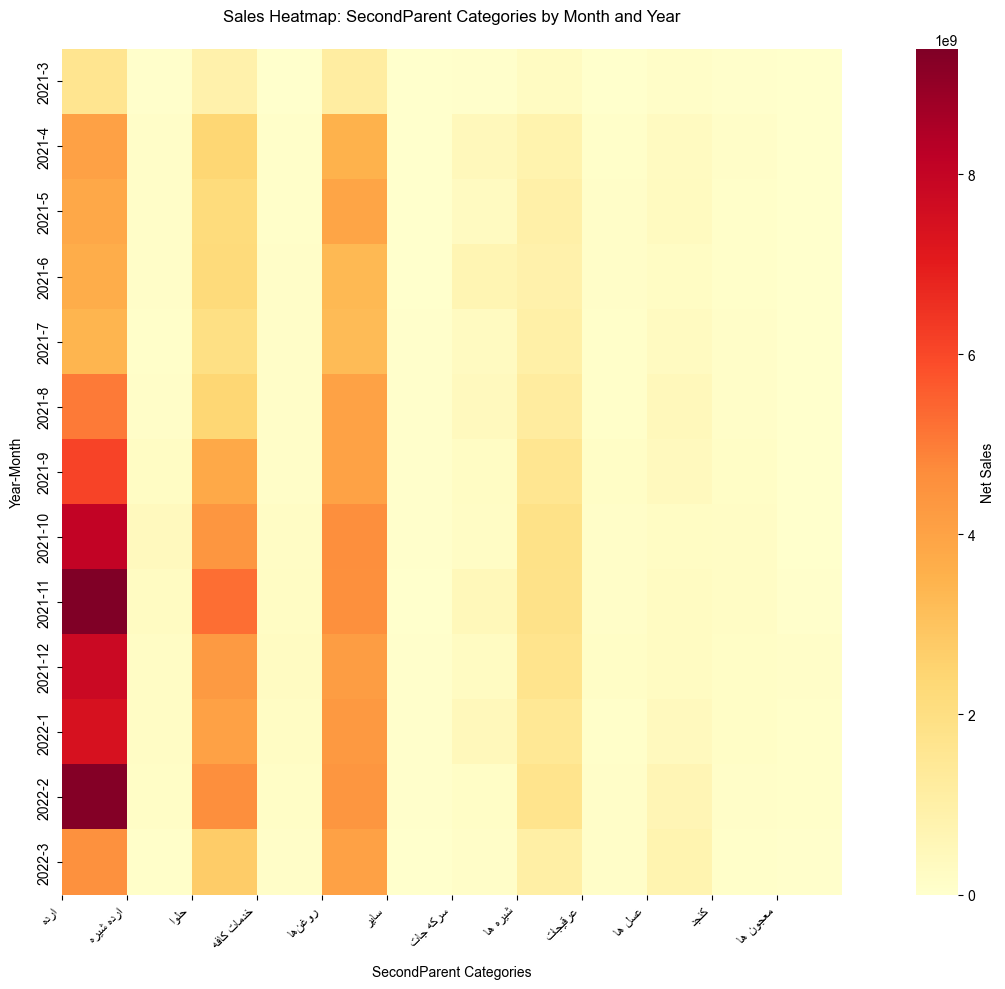

In [18]:
sales_matrix = (Food_Data.groupby(['SecondParent', 'Year', 'Month'])['NetSales']
                .sum()
                .reset_index())

# Create a pivot table for the heatmap
heatmap_data = sales_matrix.pivot_table(values='NetSales', 
                                      index=['Year', 'Month'],
                                      columns='SecondParent',
                                      fill_value=0)
plt.rcParams['font.family'] = 'Arial'  # or any other font that supports Farsi

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, 
            cmap='YlOrRd',
            annot=False,
            fmt='.0f',
            cbar_kws={'label': 'Net Sales'},
            square=True)

labels = plt.xticks()[1]

# Process each Farsi label through arabic_reshaper and bidi
reshaped_labels = [arabic_reshaper.reshape(str(label.get_text())) for label in labels]
bidi_labels = [get_display(text) for text in reshaped_labels]

# Apply the processed labels
plt.xticks(range(len(bidi_labels)), bidi_labels, rotation=45, ha='right')


# Customize the plot
plt.title('Sales Heatmap: SecondParent Categories by Month and Year', pad=20)
plt.xlabel('SecondParent Categories', labelpad=10)
plt.ylabel('Year-Month', labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

# Question10.Compare the different distributions in the weeks of the year using boxplot, swarmplot, and histplot graphs.

# Question11.Show via scatterplot. Make sure that for the net sales and weighted sales of the product, the first sales channel and FirstParent are specified in the graph.

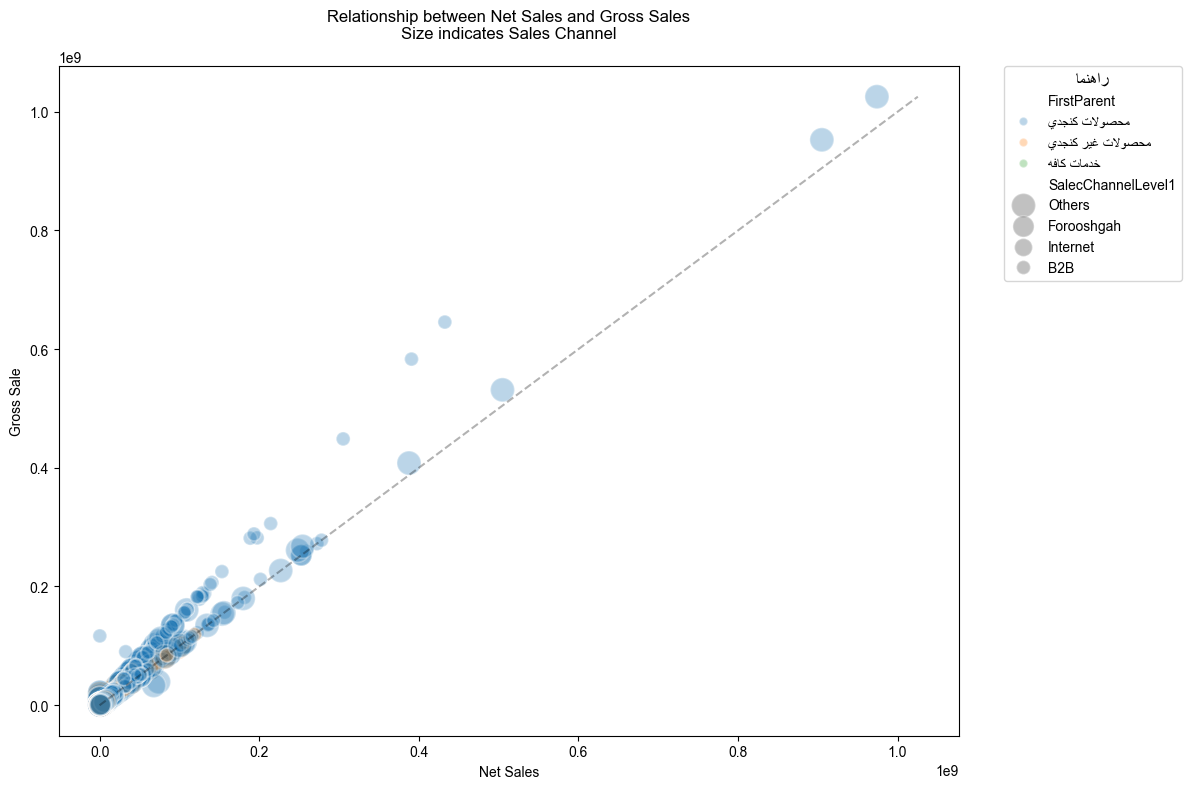

In [19]:

# Create figure with extra width for legend
plt.figure(figsize=(12, 8))

# Create scatter plot
scatter = sns.scatterplot(data=Food_Data,  
                         x='NetSales',  
                         y='GrossSale', 
                         hue='FirstParent',          
                         size='SalecChannelLevel1',   
                         sizes=(100, 300),        
                         alpha=0.3)                   

# Customize the plot
plt.title('Relationship between Net Sales and Gross Sales\nSize indicates Sales Channel', 
          pad=20)
plt.xlabel('Net Sales')
plt.ylabel('Gross Sale')

# Add reference line for perfect correlation
max_val = max(Food_Data['NetSales'].max(), Food_Data['GrossSale'].max())
min_val = min(Food_Data['NetSales'].min(), Food_Data['GrossSale'].min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3,
         )


# Process legend labels
handles, labels = plt.gca().get_legend_handles_labels()
# Process only the product category and sales channel labels (exclude the correlation line label)
farsi_labels = []
for label in labels:
    if label in Food_Data['FirstParent'].unique():
        farsi_labels.append(process_farsi_text(label))
    elif label in Food_Data['SalecChannelLevel1'].unique():
        farsi_labels.append(process_farsi_text(label))
    else:
        farsi_labels.append(process_farsi_text(label))

# Create legend with processed labels
plt.legend(handles, 
          farsi_labels,
          bbox_to_anchor=(1.05, 1),
          loc='upper left',
          borderaxespad=0,
          title=process_farsi_text('راهنما'),
          fontsize=10,
          title_fontsize=12)

# Adjust layout to prevent legend cutoff
plt.subplots_adjust(right=0.85)  
plt.tight_layout()

plt.show()

# Question12.Find best visitor (sealer) in each years

C:\Users\gigabyte\AppData\Local\Temp\ipykernel_6456\1950049843.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .sum().reset_index().groupby('Year').apply(lambda x: x.nlargest(n=5, columns='NetSales'))
C:\Users\gigabyte\AppData\Local\Temp\ipykernel_6456\1950049843.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[idx].set_xticklabels([process_farsi_text(name) for name in year_data['VisitorName']],
C:\Users\gigabyte\AppData\Local\Temp\ipykernel_6456\1950049843.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[idx].s

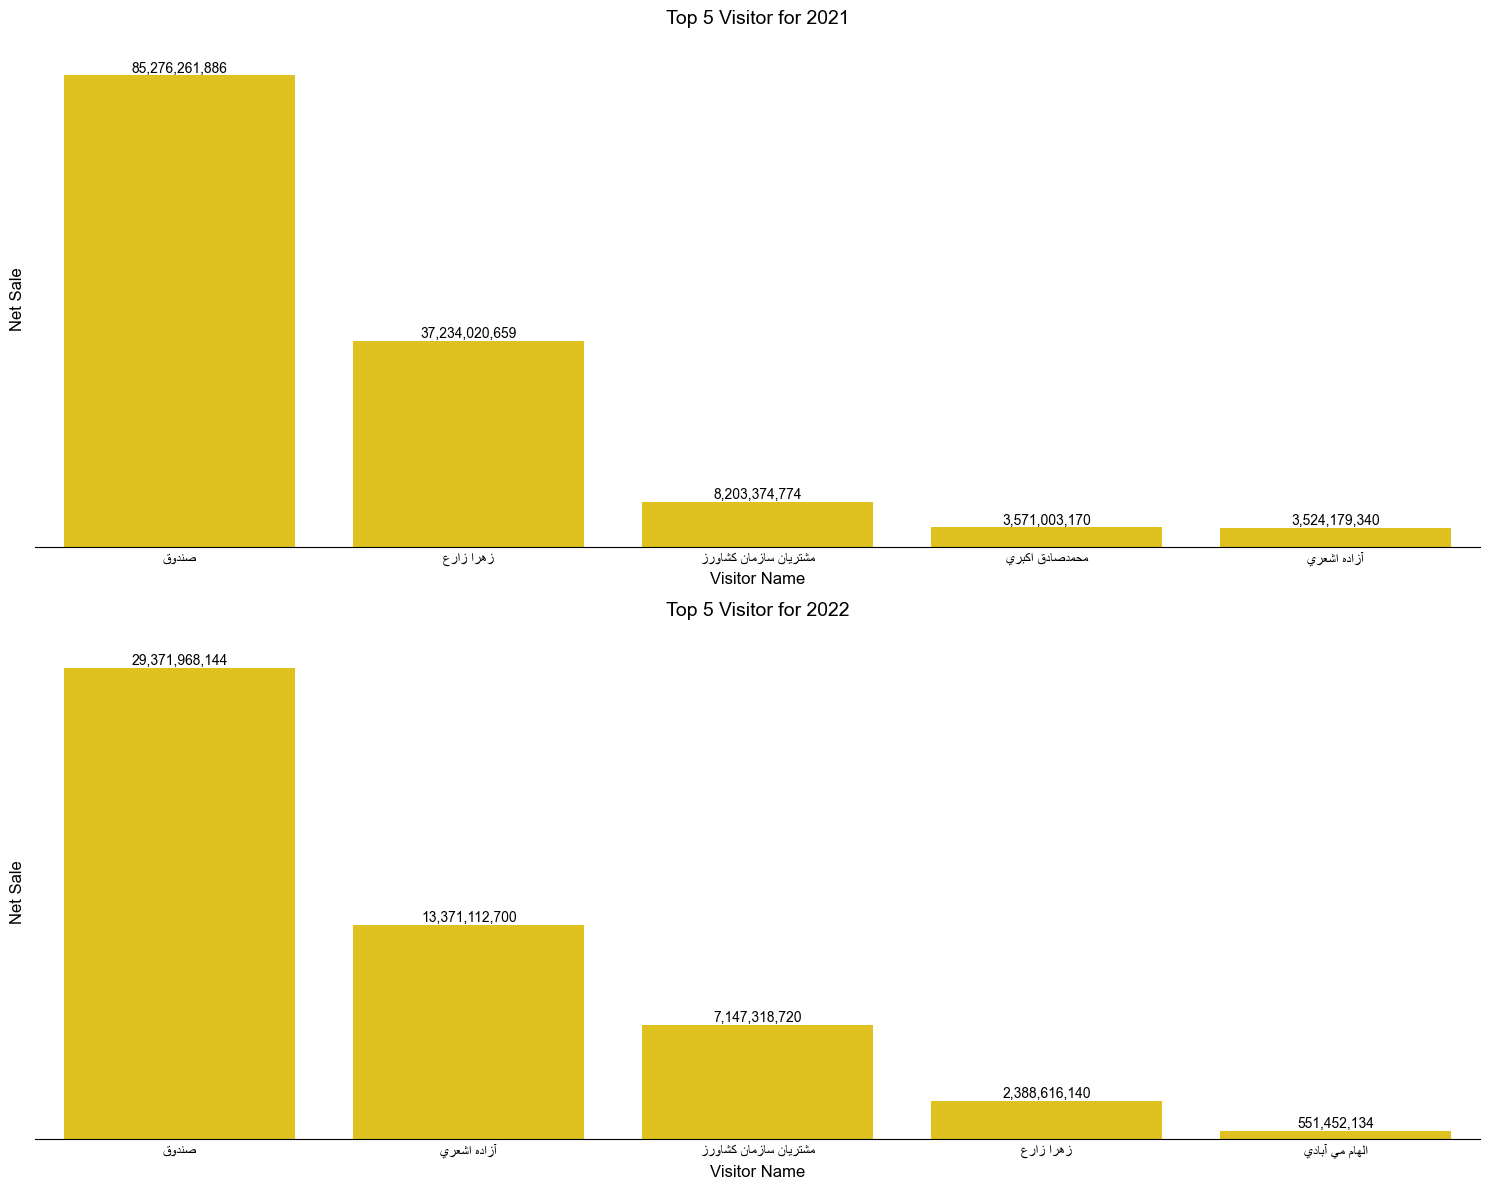

In [20]:
top_visitors_by_year = (Food_Data.groupby(['Year', 'VisitorName'])['NetSales']
                       .sum().reset_index().groupby('Year').apply(lambda x: x.nlargest(n=5, columns='NetSales'))
                       .reset_index(drop=True))


# Create subplot for each year
unique_years = sorted(top_visitors_by_year['Year'].unique())
n_years = len(unique_years)
fig, axs = plt.subplots(n_years, 1, figsize=(15, 6*n_years))


# Plot for each year
for idx, year in enumerate(unique_years):
    year_data = top_visitors_by_year[top_visitors_by_year['Year'] == year]
    
    # Create bar plot using seaborn
    sns.barplot(data=year_data,
                x='VisitorName',
                y='NetSales',
                color='#ffd700',
                ax=axs[idx])
    
    # Add value labels on top of bars
    for i, v in enumerate(year_data['NetSales']):
        axs[idx].text(i, v, f'{v:,.0f}',
                     ha='center',
                     va='bottom',
                     rotation=0)
    
    # Customize the plot
    axs[idx].set_title(f'Top 5 Visitor for {year}',
                       pad=20,
                       fontsize=14)
    axs[idx].set_xlabel('Visitor Name',
                       fontsize=12)
    axs[idx].set_ylabel('Net Sale',
                       fontsize=12)
    
    # Rotate x-axis labels
    axs[idx].set_xticklabels([process_farsi_text(name) for name in year_data['VisitorName']],
                            ha='center')
    
    # Remove spines
    for spine in ['top', 'right', 'left']:
        axs[idx].spines[spine].set_visible(False)
    
   
    axs[idx].set_yticklabels([])  # Remove y-axis numbers
    
    # Remove ticks
    axs[idx].tick_params(axis='y', length=0)
    axs[idx].tick_params(axis='x', length=0)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()